# Data Preprocessing

In [1]:
#importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading dataset
data=pd.read_csv('hr_data.csv')
data

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


In [3]:
#loading excel file of employee satisfaction_evalution
df2=pd.read_excel('employee_satisfaction_evaluation.xlsx')
df2

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


In [4]:
main_df=data.set_index('employee_id').join(df2.set_index('EMPLOYEE #'))


In [5]:
main_df.reset_index(inplace=True)

In [6]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [7]:
main_df.drop('employee_id',axis=1,inplace=True)
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [8]:
#check missing value
main_df[main_df.isnull().any(axis=1)]

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,2,160,3,1,1,1,sales,low,NaN,NaN
19,5,262,5,0,1,0,sales,low,NaN,0.89
33,2,140,3,0,1,0,hr,low,NaN,NaN
53,2,132,3,0,1,0,support,low,NaN,NaN
72,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,2,143,3,0,1,0,sales,low,NaN,NaN
107,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,4,158,4,1,1,0,technical,low,NaN,NaN
137,2,129,3,0,1,0,management,low,NaN,NaN
175,4,164,2,0,1,0,sales,low,NaN,NaN


In [9]:
#fill missing values by mean
main_df.fillna(main_df.mean(),inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
main_df.department=enc.fit_transform(main_df.department)
main_df.salary=enc.fit_transform(main_df.salary)

#high-->0
#low-->1
#medium-->2

In [11]:
main_df.head()
inplace=True


In [12]:
x=main_df.drop('left',axis=1)
y=main_df['left']

In [13]:
#split the data into training ad testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10499, 9), (4500, 9), (10499,), (4500,))

In [15]:
#Standard Scaler
#no need of Scaling in Decision Tree algorithm

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
y_predict=dtree.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [19]:
confusion_matrix(y_test,y_predict)

array([[3371,   91],
       [  34, 1004]], dtype=int64)

In [20]:
print('accuracy of model is',round(accuracy_score(y_test,y_predict)*100,2),'%')

accuracy of model is 97.22 %


In [21]:
dt_score=accuracy_score(y_test,y_predict)*100

In [22]:
category=['employee will not quit','employee will  quit']


In [23]:
main_df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,7,1,0.38,0.53
1,5,262,6,0,1,0,7,2,0.80,0.86
2,7,272,4,0,1,0,7,2,0.11,0.88
3,5,223,5,0,1,0,7,1,0.72,0.87
4,2,159,3,0,1,0,7,1,0.37,0.52


In [24]:
#input custom data for cross verification 
custom_data=[[2,200,4,1,1,3,2,0.45,0.42]]

In [25]:
predcit=dtree.predict(custom_data)

In [26]:
s=int(predcit)
print(category[s])


employee will not quit


In [27]:
dtree.feature_importances_

array([9.79140916e-02, 1.05343457e-01, 1.28872127e-01, 5.82897250e-05,
       3.78354860e-04, 9.63739922e-03, 6.69590518e-03, 4.97021473e-01,
       1.54078902e-01])

In [28]:
feature_importance=pd.DataFrame(dtree.feature_importances_,index=x_train.columns,columns=['importance']).sort_values('importance',ascending=False)

In [29]:
feature_importance

,importance
satisfaction_level,0.497021
last_evaluation,0.154079
time_spend_company,0.128872
average_montly_hours,0.105343
number_project,0.097914
department,0.009637
salary,0.006696
promotion_last_5years,0.000378
Work_accident,0.000058


In [30]:
#KNN

In [31]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
td_x_train=std.fit_transform(x_train)
td_x_test=std.fit_transform(x_test)



In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
model_knn=KNeighborsClassifier(n_neighbors=10)
model_knn.fit(td_x_train,y_train)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [34]:
predict_knn=model_knn.predict(td_x_test)

In [35]:
print('the accuracy_score of KNN is: ',round(accuracy_score(y_test,predict_knn)*100,2),'%')

the accuracy_score of KNN is:  95.16 %


In [36]:
knn_score=accuracy_score(y_test,predict_knn)*100

In [37]:
scores=[knn_score,dt_score]
algorithms=['KNN','DecisionTree']

for i in range(len(algorithms)):
    print('the accuracy_score of '+algorithms[i],'is:'+str(scores[i]),'.')

the accuracy_score of KNN is:95.15555555555557 .
the accuracy_score of DecisionTree is:97.22222222222221 .


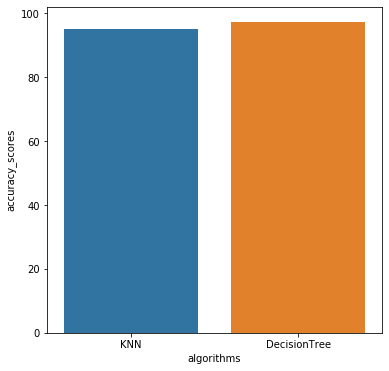

In [38]:
plt.figure(figsize=(6,6))
plt.xlabel('algorithms')
plt.ylabel('accuracy_scores')
sns.barplot(algorithms,scores)

In [39]:
#Decision_Tree gives highest accuracy score